In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Matplotlib is building the font cache; this may take a moment.


In [4]:
# NumPy Operations 
# Create an array and perform elementwise operations.
x = [1,2,3]
arr = np.array(x) 
print(arr ** 2) 

# Compare loop vs vectorized execution.
%timeit [a * 2 for a in x]
%timeit x * 2

[1 4 9]
118 ns ± 1.55 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
25.3 ns ± 0.033 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [7]:
# Dataset Loading
# Load provided CSV (data/starter_data.csv) using pandas.
df = pd.read_csv('../data/starter_data.csv') # .. = parent directory

# Inspect with .info() and .head().
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05


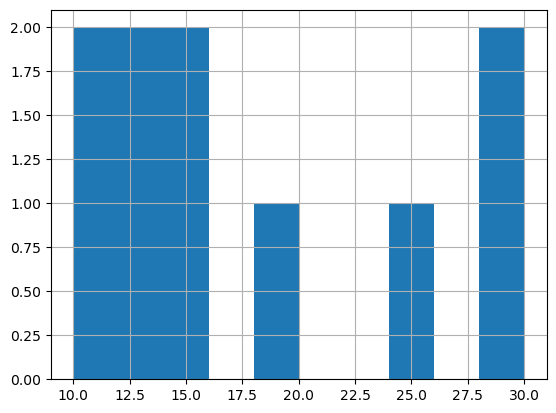

In [31]:
# Summary Statistics & Save Outputs
# Calculate .describe() for numeric columns.
df.describe()

# Perform .groupby() aggregation by category.
summary = df.groupby('category').mean(numeric_only=True).reset_index()

# Save summary stats to data/processed/summary.csv or .json.
summary.to_csv('../data/processed/summary.csv', index=False)
summary

# Add information from describe() into the csv file 
existing_summary = pd.read_csv('../data/processed/summary.csv')
desc = df.describe().transpose().reset_index()
desc.rename(columns={'index':'category', 'mean':'value'}, inplace=True) # in summary.csv, col "value" shows mean value
desc['category'] = '.describe()' 

combined = pd.concat([existing_summary, desc], ignore_index=True)
combined.to_csv('../data/processed/summary.csv', index=False)

# Bonus: Create and save a basic plot.
df['value'].hist()
plt.savefig('../data/processed/histogram.png')

In [46]:
# Reusable Functions
# Write at least one utility function (e.g., get_summary_stats(df)).
def get_summary_stats(df):
    print(df.describe())
    print()
    summary = df.groupby('category').mean(numeric_only=True).reset_index()
    print(summary)

# Bonus: Move function to src/utils.py and import in notebook.
import sys
import os
sys.path.append(os.path.abspath(".."))

from src.utils import get_summary_stats
get_summary_stats(df)

           value
count  10.000000
mean   17.600000
std     7.381659
min    10.000000
25%    12.250000
50%    14.500000
75%    23.250000
max    30.000000



,category,value
0,A,11.500000
1,B,15.666667
2,C,27.666667
